# Simple Analytics
This notebook loads the JSONL output and visualizes basic stats

In [2]:
!pip install wordcloud

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [ ]:
path = "../output/medlineplus.jsonl"
records = [json.loads(line) for line in open(path)]
df = pd.DataFrame(records)
df.head()

,url,title,description,body_text,content_hash,word_count,char_count,text_length,readability_score,source_domain,language,keywords,content_type,summary,questions,fetched_at
0,https://medlineplus.gov/diabetestype1.html,Diabetes Type 1,"If the pancreas doesn't make needed insulin, c...","Diabetes means your blood glucose, or blood su...",6e1deb043c341e88297d22540ab2811828cae9c45813b3...,180,1009,medium,8.835,medlineplus.gov,en,"[blood, Diabetes, blood sugar, glucose, insuli...",health_topic_page,"If the pancreas doesn't make needed insulin, c...",[],1764220056
1,https://medlineplus.gov/jawinjuriesanddisorder...,Jaw Injuries and Disorders,The types of jaw injuries and disorders that c...,Your jaw is a set of bones that holds your tee...,3f08135b831b0b2472de17f9500c4ed5599900848e1290...,192,1106,medium,6.331,medlineplus.gov,en,"[jaw, holds, teeth, part, bones, teeth in plac...",health_topic_page,The types of jaw injuries and disorders that c...,[],1764220056
2,https://medlineplus.gov/healthtopics_j.html#top,Health Topics: J,Health topics starting with J: alphabetical li...,An official website of the United States gover...,4ca04bd6c7adecb848bf97cfcc6aa911e03ac3d563c2c8...,60,382,short,5.449,medlineplus.gov,en,"[United States government, States government H...",health_topic_page,Health topics starting with J: alphabetical li...,[],1764220056
3,https://medlineplus.gov/tineainfections.html,Tinea Infections,Tinea are skin diseases caused by fungus like ...,Tinea is the name of a group of diseases cause...,28806ecc93b7c38acad6847ebbdfbd2dd1ca910e0a231a...,144,861,medium,6.471,medlineplus.gov,en,"[group of diseases, diseases caused, Tinea, jo...",health_topic_page,Tinea are skin diseases caused by fungus like ...,[],1764220056
4,https://medlineplus.gov/healthtopics_j.html#start,Health Topics: J,Health topics starting with J: alphabetical li...,An official website of the United States gover...,4ca04bd6c7adecb848bf97cfcc6aa911e03ac3d563c2c8...,60,382,short,5.449,medlineplus.gov,en,"[United States government, States government H...",health_topic_page,Health topics starting with J: alphabetical li...,[],1764220056


## Document Length Distribution

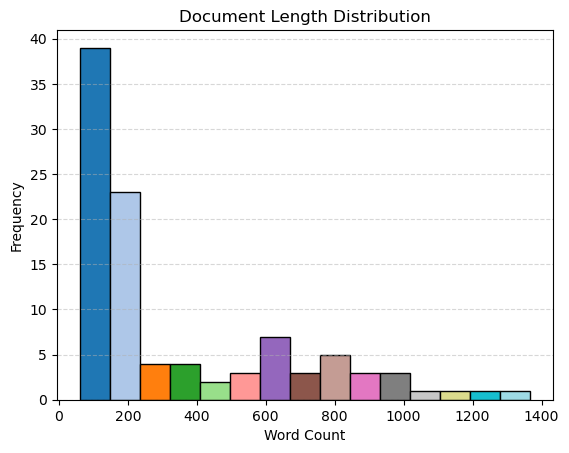

In [14]:
# Create bins
counts, bins = np.histogram(df['word_count'], bins=15)

# Generate a unique color per bar
colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))

# Plot manually bar-by-bar
plt.bar(
    bins[:-1],
    counts,
    width=np.diff(bins),
    color=colors,
    edgecolor="black",
    align='edge'
)

plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Document Length Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Language Distribution

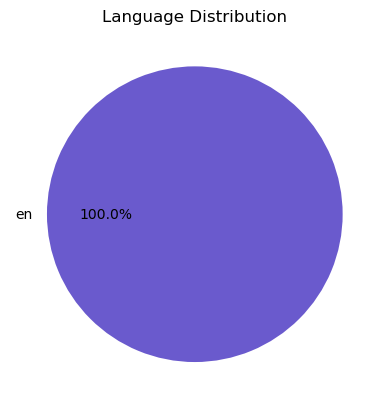

In [ ]:
colors = ["#6a5acd", "#ff7f50", "#20b2aa", "#ffd700", "#87cefa"]

df['language'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors
)

plt.title("Language Distribution")
plt.ylabel("")
plt.show()

## Readability vs Length Scatter Plot

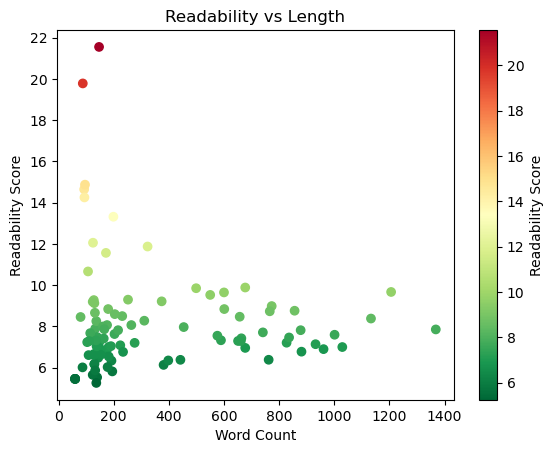

In [ ]:
plt.scatter(
    df['word_count'],
    df['readability_score'],
    c=df['readability_score'],
    cmap='RdYlGn_r'
)
plt.colorbar(label="Readability Score")
plt.xlabel("Word Count")
plt.ylabel("Readability Score")
plt.title("Readability vs Length")
plt.show()

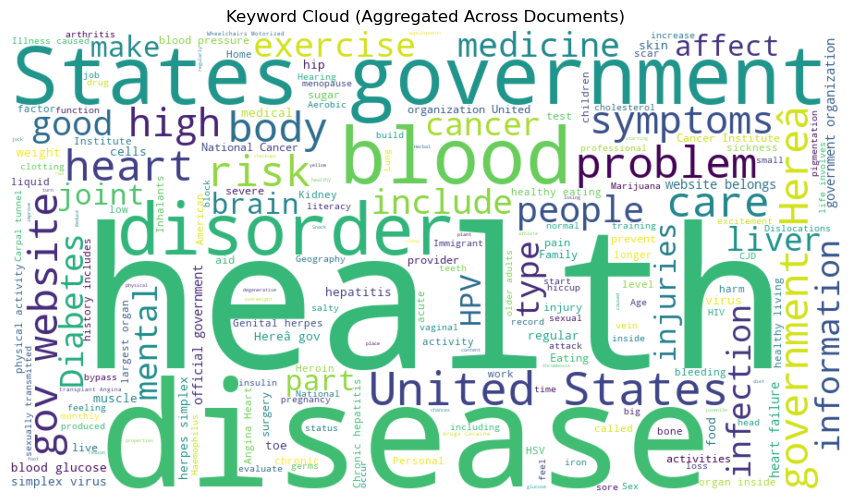

In [11]:
all_keywords = [kw for kws in df["keywords"] for kw in kws if isinstance(kws, list)]
text_blob = " ".join(all_keywords)

wc = WordCloud(width=900, height=500, background_color="white").generate(text_blob)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Keyword Cloud (Aggregated Across Documents)")
plt.show()